### Importing required libraries

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import warnings                      # Use to supress warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [5]:
# Reading new preprocessed csv file
data = pd.read_csv('Preprocessed_data.csv')

In [6]:
data

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion_square,YearsWithCurrManager,Attrition,PerformanceRating
0,0,0.333333,1.0,0.4,1.0,1.0,0.722222,1.0,0.321429,0.50,...,1.000000,0.250,0.333333,0.333333,0.250,0.388889,0.000000,0.470588,0.0,1.0
1,1,0.690476,1.0,0.4,1.0,1.0,0.722222,1.0,0.464286,0.75,...,1.000000,0.500,0.333333,0.666667,0.175,0.388889,0.377964,0.411765,0.0,1.0
2,2,0.523810,1.0,0.2,0.5,1.0,0.722222,0.5,0.142857,0.75,...,0.666667,0.500,0.333333,0.666667,0.450,0.722222,0.377964,0.705882,0.0,1.0
3,3,0.547619,1.0,0.0,0.0,0.6,0.444444,1.0,0.321429,0.75,...,0.333333,0.575,0.333333,0.333333,0.525,0.333333,0.377964,0.352941,0.0,1.0
4,4,1.000000,1.0,0.4,1.0,1.0,0.722222,1.0,0.535714,0.75,...,1.000000,0.250,0.166667,0.666667,0.050,0.111111,0.534522,0.117647,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,0.214286,0.0,0.6,0.0,1.0,0.722222,0.5,0.071429,0.00,...,0.333333,0.150,0.500000,0.666667,0.150,0.277778,0.000000,0.235294,0.0,1.0
1196,1196,0.452381,1.0,0.2,1.0,0.2,0.833333,1.0,0.321429,0.25,...,0.000000,0.100,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,0.0,1.0
1197,1197,0.761905,1.0,0.6,0.5,0.2,0.833333,1.0,0.964286,0.00,...,0.666667,0.500,0.500000,0.666667,0.500,0.444444,0.654654,0.470588,0.0,1.0
1198,1198,0.380952,0.0,0.6,1.0,0.0,0.055556,1.0,0.285714,0.50,...,0.333333,0.225,0.500000,1.000000,0.200,0.388889,1.000000,0.411765,0.0,1.0


In [7]:
# dropping useless columns
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.head(2)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion_square,YearsWithCurrManager,Attrition,PerformanceRating
0,0.333333,1.0,0.4,1.0,1.0,0.722222,1.0,0.321429,0.50,1.0,...,1.0,0.25,0.333333,0.333333,0.250,0.388889,0.000000,0.470588,0.0,1.0
1,0.690476,1.0,0.4,1.0,1.0,0.722222,1.0,0.464286,0.75,1.0,...,1.0,0.50,0.333333,0.666667,0.175,0.388889,0.377964,0.411765,0.0,1.0


# Splitting the dataset

In [9]:
#drfining X and y 
X=data.iloc[0:,:-1]   #except the last feature all are take
y=data.PerformanceRating #only the target feature is taken

# Model Creation

In [10]:
X

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion_square,YearsWithCurrManager,Attrition
0,0.333333,1.0,0.4,1.0,1.0,0.722222,1.0,0.321429,0.50,1.000000,...,0.071429,1.000000,0.250,0.333333,0.333333,0.250,0.388889,0.000000,0.470588,0.0
1,0.690476,1.0,0.4,1.0,1.0,0.722222,1.0,0.464286,0.75,1.000000,...,0.071429,1.000000,0.500,0.333333,0.666667,0.175,0.388889,0.377964,0.411765,0.0
2,0.523810,1.0,0.2,0.5,1.0,0.722222,0.5,0.142857,0.75,1.000000,...,0.714286,0.666667,0.500,0.333333,0.666667,0.450,0.722222,0.377964,0.705882,0.0
3,0.547619,1.0,0.0,0.0,0.6,0.444444,1.0,0.321429,0.75,0.333333,...,0.285714,0.333333,0.575,0.333333,0.333333,0.525,0.333333,0.377964,0.352941,0.0
4,1.000000,1.0,0.4,1.0,1.0,0.722222,1.0,0.535714,0.75,0.000000,...,0.214286,1.000000,0.250,0.166667,0.666667,0.050,0.111111,0.534522,0.117647,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.214286,0.0,0.6,0.0,1.0,0.722222,0.5,0.071429,0.00,1.000000,...,0.642857,0.333333,0.150,0.500000,0.666667,0.150,0.277778,0.000000,0.235294,0.0
1196,0.452381,1.0,0.2,1.0,0.2,0.833333,1.0,0.321429,0.25,1.000000,...,0.428571,0.000000,0.100,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,0.0
1197,0.761905,1.0,0.6,0.5,0.2,0.833333,1.0,0.964286,0.00,1.000000,...,0.000000,0.666667,0.500,0.500000,0.666667,0.500,0.444444,0.654654,0.470588,0.0
1198,0.380952,0.0,0.6,1.0,0.0,0.055556,1.0,0.285714,0.50,1.000000,...,0.214286,0.333333,0.225,0.500000,1.000000,0.200,0.388889,1.000000,0.411765,0.0


In [11]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1195    1.0
1196    1.0
1197    1.0
1198    1.0
1199    0.0
Name: PerformanceRating, Length: 1200, dtype: float64

# Splitting the dataset into train_test_split:-

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42,test_size=0.25)

# Data Balancing

### SMOTE:- 
- SMOTE stands for Synthetic Minority Oversampling Technique.
- It is a statistical technique for increasing the number of cases in the dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.
- SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data.
- SMOTE first starts by choosing random data from the minority class, then k-nearest neighbors from the data are set.
- It is done when the dataset is imbalance in case of Classification task.

In [13]:
#installing source
! pip install imblearn

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='Outcome'>

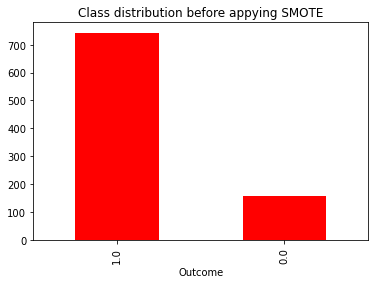

In [14]:
#Checking distribution before applying smote
pd.Series(y_train).value_counts().plot(kind='bar',color='red',title='Class distribution before appying SMOTE', xlabel='Outcome')

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [16]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Outcome'>

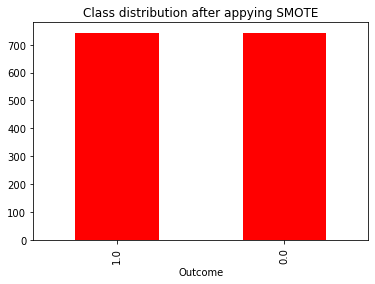

In [17]:
pd.Series(y_smote).value_counts().plot(kind='bar',color='red',title='Class distribution after appying SMOTE', xlabel='Outcome')

# Model Creation

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [19]:
clf.fit(X_smote,y_smote) 

LogisticRegression()

In [20]:
y_pred = clf.predict(X_test) #test
y_pred_train = clf.predict(X_smote) #training

In [21]:
print(f1_score(y_test,y_pred)) #testing
print(f1_score(y_smote,y_pred_train)) #training

0.9090909090909091
0.9035392088827204


In [22]:
print(accuracy_score(y_test,y_pred)) #testing
print(accuracy_score(y_smote,y_pred_train)) #training

0.85
0.9064602960969045


In [23]:
print(precision_score(y_test,y_pred)) #testing
print(precision_score(y_smote,y_pred_train)) #training

0.9698275862068966
0.9326647564469914


In [24]:
print(recall_score(y_test,y_pred)) #testing
print(recall_score(y_smote,y_pred_train)) #training

0.8555133079847909
0.8761776581426649


In [133]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [134]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Logistic Regression", "0.90",'0.85','0.96','0.85'])

In [135]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["Logistic Regression", "0.90",'0.90','0.93','0.87'])

In [136]:
print(x)
print(y)

+---------------------+----------+----------+-----------+--------+
|     Model(Test)     | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |   0.90   |   0.85   |    0.96   |  0.85  |
+---------------------+----------+----------+-----------+--------+
+---------------------+----------+----------+-----------+--------+
|     Model(Train)    | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |   0.90   |   0.90   |    0.93   |  0.87  |
+---------------------+----------+----------+-----------+--------+


### Observations-

- The f1-score for test data is 0.90 and for train data is 0.90.
- The accuracy score for test data is 0.85 and for train data is 0.90.
- The precision score for test data is 0.96 and for train data is 0.93.
- The recall score for test data is 0.85 and for train data is 0.87
- The model has low bias and low variance so it can be considered as a generalised model.

# Support Vector Machine - Classifier

In [29]:
from sklearn.svm import SVC
svclassifier = SVC()

In [30]:
svclassifier.fit(X_smote, y_smote) # Training the model

SVC()

In [31]:
X_pred1 = svclassifier.predict(X_test) #Prediction for test data
X_pred_train1= svclassifier.predict(X_smote) #prediction for training data

In [32]:
print(f1_score(y_test,X_pred1))
print(f1_score(y_smote,X_pred_train1))

0.9580152671755725
0.9795081967213115


In [33]:
print(accuracy_score(y_test,X_pred1))
print(accuracy_score(y_smote,X_pred_train1))

0.9266666666666666
0.9798115746971736


In [34]:
print(precision_score(y_test,X_pred1))
print(precision_score(y_smote,X_pred_train1))

0.9616858237547893
0.9944521497919556


In [35]:
print(recall_score(y_test,X_pred1))
print(recall_score(y_smote,X_pred_train1))

0.9543726235741445
0.9650067294751009


In [137]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [138]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Support Vector Machine", "0.95",'0.92','0.96','0.95'])

In [139]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Support Vector Machine", "0.97",'0.97','0.99','0.96'])

In [140]:
print(x)
print(y)

+--------------------------+----------+----------+-----------+--------+
|       Model(Test)        | f1_score | accuracy | precision | recall |
+--------------------------+----------+----------+-----------+--------+
| # Support Vector Machine |   0.95   |   0.92   |    0.96   |  0.95  |
+--------------------------+----------+----------+-----------+--------+
+--------------------------+----------+----------+-----------+--------+
|       Model(Train)       | f1_score | accuracy | precision | recall |
+--------------------------+----------+----------+-----------+--------+
| # Support Vector Machine |   0.97   |   0.97   |    0.99   |  0.96  |
+--------------------------+----------+----------+-----------+--------+


## Observations-

- The f1-score for test data is 0.95 and for train data is 0.97.
- The accuracy score for test data is 0.92 and for train data is 0.97.
- The precision score for test data is 0.96 and for train data is 0.99.
- The recall score for test data is 0.95 and for train data is 0.96
- The model has low bias and low variance so it can be considered as a generalised model.

# Hyperparameter tuning- Support Vector Machine( Classifier)

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,X_smote,y_smote,cv=3,scoring='f1') ## instead of svclassifier we can also give models like linear regression an dlogistic regression
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.95102041 0.9625     0.95137421]
Cross validation Score: 0.9549648717838086
Std : 0.005330097645343011


In [41]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.821 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.906 total time=   0.2s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.945 total time=   0.2s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.928 total time=   0.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.863 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.825 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.871 total time=   0.2s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.870 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.866 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.833 total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 3/5] END ...................C=1000, gamma=1;, score=0.993 total time=   0.1s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.986 total time=   0.1s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.990 total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.963 total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.940 total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.972 total time=   0.1s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.979 total time=   0.1s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.958 total time=   0.1s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.954 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.932 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.965 total time=   0.1s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.972 total time=   0.1s
[CV 5/5] END ...............

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [42]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1, 'gamma': 1}
SVC(C=1, gamma=1, random_state=42)


In [43]:
clf2=SVC(C=1, gamma=1, random_state=42)

In [44]:
clf2.fit(X_smote, y_smote)

SVC(C=1, gamma=1, random_state=42)

In [45]:
X_pred12 = clf2.predict(X_test)#testing
X_pred_train12 =clf2.predict(X_smote)

In [46]:
print(f1_score(y_test,X_pred12))
print(f1_score(y_smote,X_pred_train12))

0.9539594843462247
0.9986522911051213


In [47]:
print(accuracy_score(y_test,X_pred12))
print(accuracy_score(y_smote,X_pred_train12))

0.9166666666666666
0.9986541049798116


In [48]:
print(precision_score(y_test,X_pred12))
print(precision_score(y_smote,X_pred_train12))

0.925
1.0


In [49]:
print(recall_score(y_test,X_pred12))
print(recall_score(y_smote,X_pred_train12))

0.9847908745247148
0.9973082099596231


In [141]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [142]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Support Vector Machine", "0.95",'0.91','0.95','0.98'])

In [143]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Support Vector Machine", "0.99",'0.99','1.0','0.99'])

In [144]:
print(x)
print(y)

+--------------------------+----------+----------+-----------+--------+
|       Model(Test)        | f1_score | accuracy | precision | recall |
+--------------------------+----------+----------+-----------+--------+
| # Support Vector Machine |   0.95   |   0.91   |    0.95   |  0.98  |
+--------------------------+----------+----------+-----------+--------+
+--------------------------+----------+----------+-----------+--------+
|       Model(Train)       | f1_score | accuracy | precision | recall |
+--------------------------+----------+----------+-----------+--------+
| # Support Vector Machine |   0.99   |   0.99   |    1.0    |  0.99  |
+--------------------------+----------+----------+-----------+--------+


## Observations-
- The f1-score for test data is 0.95 and for train data is 0.99.
- The accuracy score for test data is 0.91 and for train data is 0.99.
- The precision score for test data is 0.95 and for train data is 1.0
- The recall score for test data is 0.98 and for train data is 0.99.
- The model has low bias and low variance so it can't be considered as a generalised model.

- In this algorithm, we can see that the scores have significantly dropped after using hyperparameter tuning so we will not consider tuning scores.

### Scores were getting worse after performing hyper-parameter tuning.

# K- Nearest Neighbour

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 

Text(0, 0.5, 'Error Rate')

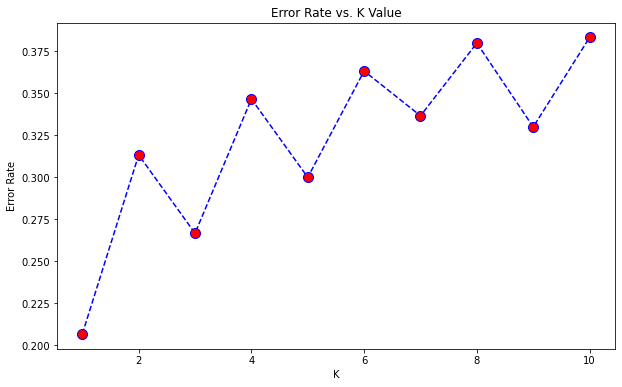

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [57]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_smote, y_smote) # Training the model

KNeighborsClassifier(n_neighbors=9)

In [58]:
X_pred = knn.predict(X_test) #testing
X_pred_train = knn.predict(X_smote) #training

In [59]:
print(f1_score(y_test,X_pred))
print(f1_score(y_smote,X_pred_train))

0.7724137931034482
0.8263943440691279


In [60]:
print(accuracy_score(y_test,X_pred))
print(accuracy_score(y_smote,X_pred_train))

0.67
0.851278600269179


In [61]:
print(recall_score(y_test,X_pred))
print(recall_score(y_smote,X_pred_train))

0.6387832699619772
0.7079407806191117


In [62]:
print(precision_score(y_test,X_pred))
print(precision_score(y_smote,X_pred_train))


0.9767441860465116
0.9924528301886792


In [206]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [207]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# K Nearest Neighbor", "0.77",'0.67','0.63','0.97'])

In [208]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# K Nearest Neighbor", "0.82",'0.85','0.70','0.99'])

In [210]:
print(x)
print(y)

+----------------------+----------+----------+-----------+--------+
|     Model(Test)      | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
| # K Nearest Neighbor |   0.77   |   0.67   |    0.63   |  0.97  |
+----------------------+----------+----------+-----------+--------+
+----------------------+----------+----------+-----------+--------+
|     Model(Train)     | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
| # K Nearest Neighbor |   0.82   |   0.85   |    0.70   |  0.99  |
+----------------------+----------+----------+-----------+--------+


## Observations-

- The f1-score for test data is 0.77 and for train data is 0.82
- The accuracy score for test data is 0.67 and for train data is 0.85
- The precision score for test data is 0.63 and for train data is 0.70
- The recall score for test data is 0.97 and for train data is 0.99
- The model has low bias and low variance so it can't be considered as a generalised model.

# Bagging( KNN)

In [67]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=knn,n_estimators=10,n_jobs=-1,random_state=42)#n_estimator is number of times model repeated 

model_bagg.fit(X_train,y_train)

y_hat_bagg=model_bagg.predict(X_test)
y_hat_bagg_train=model_bagg.predict(X_train)

In [68]:
print((f1_score(y_test,y_hat_bagg)))
print((f1_score(y_train,y_hat_bagg_train)))

0.9523809523809524
0.9351969504447268


In [69]:
print(accuracy_score(y_test,y_hat_bagg))
print(accuracy_score(y_train,y_hat_bagg_train))

0.9133333333333333
0.8866666666666667


In [70]:
print(recall_score(y_test,y_hat_bagg))
print(recall_score(y_train,y_hat_bagg_train))

0.9885931558935361
0.990578734858681


In [71]:
print(precision_score(y_test,y_hat_bagg))
print(precision_score(y_train,y_hat_bagg_train))

0.9187279151943463
0.8856799037304453


In [212]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [213]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Bagging", "0.95",'0.91','0.98','0.91'])

In [214]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Bagging", "0.93",'0.88','0.99','0.88'])

In [215]:
print(x)
print(y)

+-------------+----------+----------+-----------+--------+
| Model(Test) | f1_score | accuracy | precision | recall |
+-------------+----------+----------+-----------+--------+
|  # Bagging  |   0.95   |   0.91   |    0.98   |  0.91  |
+-------------+----------+----------+-----------+--------+
+--------------+----------+----------+-----------+--------+
| Model(Train) | f1_score | accuracy | precision | recall |
+--------------+----------+----------+-----------+--------+
|  # Bagging   |   0.93   |   0.88   |    0.99   |  0.88  |
+--------------+----------+----------+-----------+--------+


## Observations-

- The f1-score for test data is 0.95 and for train data is 0.93
- The accuracy score for test data is 0.91 and for train data is 0.88
- The precision score for test data is 0.98 and for train data is 0.99
- The recall score for test data is 0.91 and for train data is 0.88
- The model has low bias and low variance so it can be considered as a generalised model.
- After performing bagging, the scores were improved.

# Decision Tree:-

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=42)

In [77]:
dtr.fit(X_smote,y_smote)

DecisionTreeClassifier(random_state=42)

In [78]:
X_pred13 = dtr.predict(X_test)
X_pred_train13 = dtr.predict(X_smote)

In [79]:
print(f1_score(y_test,X_pred13))
print(f1_score(y_smote,X_pred_train13))

0.9731800766283526
1.0


In [80]:
print(accuracy_score(y_test,X_pred13))
print(accuracy_score(y_smote,X_pred_train13))

0.9533333333333334
1.0


In [81]:
print(precision_score(y_test,X_pred13))
print(precision_score(y_smote,X_pred_train13))

0.9806949806949807
1.0


In [82]:
print(recall_score(y_test,X_pred13))
print(recall_score(y_smote,X_pred_train13))

0.9657794676806084
1.0


In [153]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [154]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Decision Tree", "0.97",'0.95','0.98','0.96'])

In [155]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Decision Tree", "1.0",'1.0','1.0','1.0'])

In [156]:
print(x)
print(y)

+-----------------+----------+----------+-----------+--------+
|   Model(Test)   | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Decision Tree |   0.97   |   0.95   |    0.98   |  0.96  |
+-----------------+----------+----------+-----------+--------+
+-----------------+----------+----------+-----------+--------+
|   Model(Train)  | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Decision Tree |   1.0    |   1.0    |    1.0    |  1.0   |
+-----------------+----------+----------+-----------+--------+


## Observations-

- The f1-score for test data is 0.97 and for train data is 1.0
- The accuracy score for test data is 0.95 and for train data is 1.0
- The precision score for test data is 0.98 and for train data is 1.0
- The recall score for test data is 0.96 and for train data is 0.99
- The model has high bias and low variance so it can't be considered as a generalised model.
- Since,the model has high bias and low variance so hyperparameter tuning is performed.

# Hyperparameter tuning:-

In [87]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":(list(range(2, 20))),    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

In [88]:
tree_clf = DecisionTreeClassifier(random_state=1000)#object creation for decision tree with random state 3

In [89]:
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

In [90]:
tree_cv.fit(X_smote,y_smote)#training data on gridsearch cv

Fitting 3 folds for each of 25992 candidates, totalling 77976 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1000),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [91]:
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 19, 'splitter': 'random'})


In [92]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=19,splitter='random')#passing best parameter to decision tree

In [93]:
dt1.fit(X_smote,y_smote)#training model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=19,
                       splitter='random')

In [94]:
X_pred14 = dt1.predict(X_test)
X_pred_train14 = dt1.predict(X_smote)

In [95]:
print(f1_score(y_test,X_pred14))
print(f1_score(y_smote,X_pred_train14))

0.9575289575289575
0.9727891156462586


In [96]:
print(accuracy_score(y_test,X_pred14))
print(accuracy_score(y_smote,X_pred_train14))

0.9266666666666666
0.9730820995962315


In [97]:
print(precision_score(y_test,X_pred14))
print(precision_score(y_smote,X_pred_train14))

0.9725490196078431
0.9834938101788171


In [98]:
print(recall_score(y_test,X_pred14))
print(recall_score(y_smote,X_pred_train14))

0.9429657794676806
0.9623149394347241


In [216]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [217]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Decision Tree", "0.95",'0.92','0.97','0.94'])

In [218]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Decision Tree", "0.97",'0.97','0.98','0.96'])

In [219]:
print(x)
print(y)

+-----------------+----------+----------+-----------+--------+
|   Model(Test)   | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Decision Tree |   0.95   |   0.92   |    0.97   |  0.94  |
+-----------------+----------+----------+-----------+--------+
+-----------------+----------+----------+-----------+--------+
|   Model(Train)  | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Decision Tree |   0.97   |   0.97   |    0.98   |  0.96  |
+-----------------+----------+----------+-----------+--------+


## Observations-

- The f1-score for test data is 0.95 and for train data is 0.97
- The accuracy score for test data is 0.92 and for train data is 0.97
- The precision score for test data is 0.97 and for train data is 0.98
- The recall score for test data is 0.94 and for train data is 0.96
- The model has high bias and low variance so it can't be considered as a generalised model.
- The scores are not satisfactory so bagging is performed.

# Decision # Tree (Bagging)

In [200]:
from sklearn.ensemble import BaggingClassifier

# Create a decision tree classifier object
dt = DecisionTreeClassifier()

# Create a bagging classifier object
bagging = BaggingClassifier(dt, n_estimators=100)

In [201]:
bagging.fit(X_smote,y_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [105]:
bagg1 = bagging.predict(X_test)
bagg2 = bagging.predict(X_smote)

In [106]:
print(f1_score(y_test,bagg1))
print(f1_score(y_smote,bagg2))

0.9788867562380039
1.0


In [107]:
print(accuracy_score(y_test,bagg1))
print(accuracy_score(y_smote,bagg2))

0.9633333333333334
1.0


In [108]:
print(precision_score(y_test,bagg1))
print(precision_score(y_smote,bagg2))

0.9883720930232558
1.0


In [109]:
print(recall_score(y_test,bagg1))
print(recall_score(y_smote,bagg2))

0.9695817490494296
1.0


In [221]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [222]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Decision Tree (Bagging)", "0.97",'0.96','0.98','0.96'])

In [223]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Decision Tree (Bagging)", "1.0",'1.0','1.0','1.0'])

In [224]:
print(x)
print(y)

+---------------------------+----------+----------+-----------+--------+
|        Model(Test)        | f1_score | accuracy | precision | recall |
+---------------------------+----------+----------+-----------+--------+
| # Decision Tree (Bagging) |   0.97   |   0.96   |    0.98   |  0.96  |
+---------------------------+----------+----------+-----------+--------+
+---------------------------+----------+----------+-----------+--------+
|        Model(Train)       | f1_score | accuracy | precision | recall |
+---------------------------+----------+----------+-----------+--------+
| # Decision Tree (Bagging) |   1.0    |   1.0    |    1.0    |  1.0   |
+---------------------------+----------+----------+-----------+--------+


## Observations-

- The f1-score for test data is 0.97 and for train data is 1.0.
- The accuracy score for test data is 0.96 and for train data is 1.0.
- The precision score for test data is 0.98 and for train data is 1.0.
- The recall score for test data is 0.96 and for train data is 1.0.
- The model has high bias and low variance so it can't be considered as a generalised model.

# Random Forest:-

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

In [115]:
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier()

In [116]:
X_pred15 = rf_clf.predict(X_test)
X_pred_train15 = rf_clf.predict(X_smote)

In [117]:
print(f1_score(y_test,X_pred15))
print(f1_score(y_smote,X_pred_train15))

0.9828571428571429
1.0


In [118]:
print(accuracy_score(y_test,X_pred15))
print(accuracy_score(y_smote,X_pred_train15))

0.97
1.0


In [119]:
print(precision_score(y_test,X_pred15))
print(precision_score(y_smote,X_pred_train15))

0.9847328244274809
1.0


In [120]:
print(recall_score(y_test,X_pred15))
print(recall_score(y_smote,X_pred_train15))

0.9809885931558935
1.0


In [225]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [226]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Random Forest", "0.98",'0.97','0.98','0.98'])

In [227]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Random Forest", "1.0",'1.0','1.0','1.0'])

In [228]:
print(x)
print(y)

+-----------------+----------+----------+-----------+--------+
|   Model(Test)   | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Random Forest |   0.98   |   0.97   |    0.98   |  0.98  |
+-----------------+----------+----------+-----------+--------+
+-----------------+----------+----------+-----------+--------+
|   Model(Train)  | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Random Forest |   1.0    |   1.0    |    1.0    |  1.0   |
+-----------------+----------+----------+-----------+--------+


## Observations-

- The f1-score for test data is 0.98 and for train data is 1.0
- The accuracy score for test data is 0.97 and for train data is 1.0
- The precision score for test data is 0.98 and for train data is 1.0
- The recall score for test data is 0.98 and for train data is 1.0
- The model has high bias and low variance so it can't be considered as a generalised model.

# Hyperparameter tuning( Random Forest):-

In [125]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = (list(range(2, 20)))#minimum number of samples required to split an internal node
min_samples_leaf = (list(range(2, 20)))#minimum number of samples required to be at a leaf node.


In [126]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [127]:
#MODEL Creation
rf_clf1 = RandomForestClassifier(random_state=42)#model

In [128]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [129]:
rf_cv.fit(X_smote, y_smote) #training the model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [130]:
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})") 

Best paramters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 110})


In [169]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 200, min_samples_split= 4, min_samples_leaf= 2, 
                                 max_features= 'log2', max_depth= 110)

In [170]:
rf_clf2.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=110, max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=200)

In [171]:
X_pred16 = rf_clf2.predict(X_test)
X_pred_train16 = rf_clf2.predict(X_smote)

In [172]:
print(f1_score(y_test,X_pred16))
print(f1_score(y_smote,X_pred_train16))

0.9828571428571429
0.9952988582941571


In [173]:
print(accuracy_score(y_test,X_pred16))
print(accuracy_score(y_smote,X_pred_train16))

0.97
0.9952893674293405


In [174]:
print(precision_score(y_test,X_pred16))
print(precision_score(y_smote,X_pred_train16))

0.9847328244274809
0.9932975871313673


In [175]:
print(recall_score(y_test,X_pred16))
print(recall_score(y_smote,X_pred_train16))

0.9809885931558935
0.9973082099596231


In [229]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [230]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Random Forest (Hyperparameter)", "0.98",'0.97','0.98','0.98'])

In [231]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Random Forest (Hyperparameter)", "0.99",'0.99','0.99','0.99'])

In [232]:
print(x)
print(y)

+----------------------------------+----------+----------+-----------+--------+
|           Model(Test)            | f1_score | accuracy | precision | recall |
+----------------------------------+----------+----------+-----------+--------+
| # Random Forest (Hyperparameter) |   0.98   |   0.97   |    0.98   |  0.98  |
+----------------------------------+----------+----------+-----------+--------+
+----------------------------------+----------+----------+-----------+--------+
|           Model(Train)           | f1_score | accuracy | precision | recall |
+----------------------------------+----------+----------+-----------+--------+
| # Random Forest (Hyperparameter) |   0.99   |   0.99   |    0.99   |  0.99  |
+----------------------------------+----------+----------+-----------+--------+


Observations-

- The f1-score for test data is 0.98 and for train data is 0.99
- The accuracy score for test data is 0.97 and for train data is 0.99
- The precision score for test data is 0.98 and for train data is 0.99
- The recall score for test data is 0.98 and for train data is 0.99
- The model has high bias and low variance so it can't be considered as a generalised model.

# Gradient Boosting

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=44)

In [182]:
clf.fit(X_smote,y_smote)#training model with best parameter

GradientBoostingClassifier(random_state=44)

In [183]:
boost1 = clf.predict(X_test)
boost2 = clf.predict(X_smote)

In [184]:
print(f1_score(y_test,boost1))
print(f1_score(y_smote,boost2))

0.9788867562380039
0.9959514170040487


In [185]:
print(accuracy_score(y_test,boost1))
print(accuracy_score(y_smote,boost2))

0.9633333333333334
0.9959623149394348


In [186]:
print(precision_score(y_test,boost1))
print(precision_score(y_smote,boost2))

0.9883720930232558
0.9986468200270636


In [187]:
print(recall_score(y_test,boost1))
print(recall_score(y_smote,boost2))

0.9695817490494296
0.9932705248990579


In [233]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [234]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Gradient Boosting", "0.97",'0.96','0.98','0.96'])

In [235]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Gradient Boosting", "0.99",'0.99','0.99','0.99'])

In [236]:
print(x)
print(y)

+---------------------+----------+----------+-----------+--------+
|     Model(Test)     | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| # Gradient Boosting |   0.97   |   0.96   |    0.98   |  0.96  |
+---------------------+----------+----------+-----------+--------+
+---------------------+----------+----------+-----------+--------+
|     Model(Train)    | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| # Gradient Boosting |   0.99   |   0.99   |    0.99   |  0.99  |
+---------------------+----------+----------+-----------+--------+


Observations-

- The f1-score for test data is 0.97 and for train data is 0.99
- The accuracy score for test data is 0.96 and for train data is 0.99
- The precision score for test data is 0.98 and for train data is 0.99
- The recall score for test data is 0.96 and for train data is 0.99
- The model has low bias and low variance so it can be considered as a generalised model.

# Conclusion-

- In this project,nearly six machine learning models i.e logistic regression, support vector machine(classifier), K- Nearest Neighbour, Decission tree, Random forest and Gradient boosting were examined to predict the performance rating of the employees in the company.The given dataset is a multiclass classification task for the easy of performing the task, the mutliclass classification task was converted into binary classification for better prediction and analysis at the business segment level.
- Also Ensemble techniques such as bagging and boosting were also examined.
- The training and testing data were used to train and test the data.These records were used to extract a number of characteristics.My suggested model can estimate the performance rating of the employees in the business level.
- In this study almost all the models are performing good such as **Logistic Regression, Support Vector Classifier, K-nearest neighbour(bagging),Decision tree(tuned),random forest(tuned) and GradientBoosting**,
- **But the best performing model to predict the performance rating of the employees are K- Nearest Neighbour,Random Forest(tuned) and Gradient Boosting**
- **K-nearest neighbour** is a simple machine learning algorithm also known as KNN or k-NN, it is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.The KNN algorithm has no explicit training step and all the work happens during prediction.Hence, it is also known as Lazy algorithm.
- **Random forest** is a machine learning algorithm.It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.It consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.It’s more accurate than the decision tree algorithm.
- **Gradient Boosting** is a powerful boosting algorithm that combines several weak learners into strong learners.The main idea behind this algorithm is to build models sequentially and these subsequent models try to reduce the errors of the previous model.
- The project was successfully submitted as per the guideliness.